## Lesson 1
### Hierarchical Clustering

Clustering organizes things that are **close** into groups
* How to we define close?
* How do we group things?
* How do we visualize the grouping?
* How do we interpret the grouping?

Hierarchial Clustering
* An agglomerative approach
    - Find closest two things
    - Put them together
    - Find next closest
* Requires
    - A defined distance
    - A merging approach
* Produces
    - A tree showing how close things are to each other

How do we define close
* Most important step
    - Garbage in > garbage out
* Distance or similarity
    - Continuous - eulidean distance
    - Continuous - correlation similarity
    - Binary - manhattan distance
* Pick a distance/similarity that makes sense for your problem


### Example

In [3]:
#Setup the plot sizes for the remainder of the notebook
library(repr)
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.pointsize = 8)

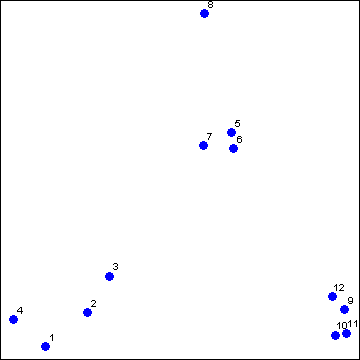

In [13]:
set.seed(1234)
par(mar = c(0,0,0,0))
x <- rnorm(12, mean = rep(1:3, each =4), sd = 0.2)
y <- rnorm(12, mean = rep(c(1,2,1), each = 4), sd = 0.2)
plot(x,y, col = "blue", pch = 19, cex = 1.5)
text(x + 0.05, y + 0.05, labels = as.character(1:12), cex = 0.5)


In [8]:
#Calculate the distance of each point from each other
dataFrame <- data.frame(x = x, y = y)
dist(dataFrame)

            1          2          3          4          5          6          7
2  0.34120511                                                                  
3  0.57493739 0.24102750                                                       
4  0.26381786 0.52578819 0.71861759                                            
5  1.69424700 1.35818182 1.11952883 1.80666768                                 
6  1.65812902 1.31960442 1.08338841 1.78081321 0.08150268                      
7  1.49823399 1.16620981 0.92568723 1.60131659 0.21110433 0.21666557           
8  1.99149025 1.69093111 1.45648906 2.02849490 0.61704200 0.69791931 0.65062566
9  2.13629539 1.83167669 1.67835968 2.35675598 1.18349654 1.11500116 1.28582631
10 2.06419586 1.76999236 1.63109790 2.29239480 1.23847877 1.16550201 1.32063059
11 2.14702468 1.85183204 1.71074417 2.37461984 1.28153948 1.21077373 1.37369662
12 2.05664233 1.74662555 1.58658782 2.27232243 1.07700974 1.00777231 1.17740375
            8          9         10     

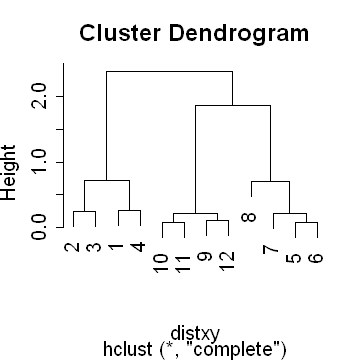

In [14]:
#Using hclust
dataFrame <- data.frame(x=x, y=y)
distxy <- dist(dataFrame)
hClustering <- hclust(distxy)
plot(hClustering)

### Prettier dendrograms

In [15]:
myplclust <- function(hclust, lab = hclust$labels, lab.col = rep(1, length(hclust$labels)), hang = 0.1, ...) {
    ## modification of plclust for plotting hclust objects in color, Copyright Eav KF Chan 2009 Arguments: 
    ## hclust: hclust object lab: a character vector of labels of the leaves of ther tree lab.col: colour 
    ## for the labels; NA=default device foreground colour hang: as in hclust and plclust Side effect: A 
    ## display of hierarchical cluster with coloured leaf labels.
        y <- rep(hclust$height, 2)
    x <- as.numeric(hclust$merge)
    y <- y[which(x<0)]
    x <- x[which(x<0)]
    x <- abs(x)
    y <- y[order(x)]
    x <- x[order(x)]
    plot(hclust, labels = FALSE, hang = hang, ...)
    text(x=x, y=y[hclust$order] - (max(hclust$height)*hang), labels = lab[hclust$order], col = lab.col[hclust$order], srt = 90, adj = c(1,0.5), xpd = NA, ...
        )
    
}

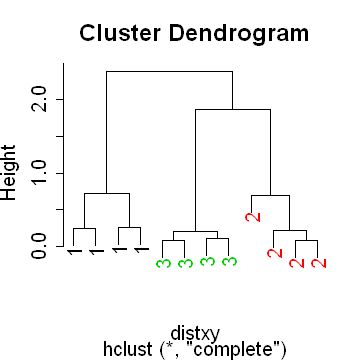

In [16]:
dataFrame <- data.frame(x=x, y=y)
distxy <- dist(dataFrame)
hClustering <- hclust(distxy)
myplclust(hClustering, lab = rep(1:3, each = 4), lab.col= rep(1:3, each = 4))

### Heatmap function

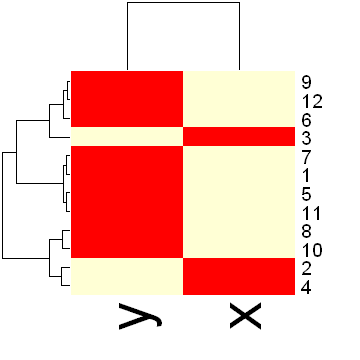

In [18]:
dataFrame <- data.frame(x=x, y=y)
set.seed(143)
dataMatrix <- as.matrix(dataFrame)[sample(1:12),]
heatmap(dataMatrix)


## Lesson 2
### K-means Clustering

A Partioning approach
* fix a number of clusters
* Get the "centeroids" of each cluster
* Assign things to closest centroid
* Recalculate centroids

Requires
* A defined distance metric
* A number of clusters
* An initial guess as to cluster centeroids

Produces
* Final estimate of cluster centeroids
* An assignment of each point to clusters

Example

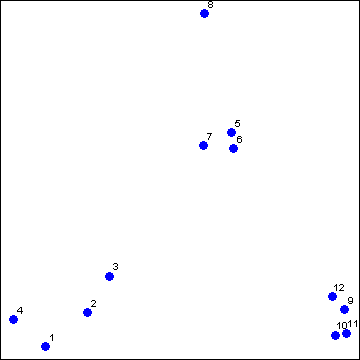

In [5]:
set.seed(1234)
par(mar = c(0,0,0,0))
x <- rnorm(12, mean = rep(1:3, each = 4), sd = 0.2)
y <- rnorm(12, mean = rep(c(1,2,1), each = 4), sd = 0.2)
plot(x,y, col = "blue", pch = 19, cex = 1.5)
text(x + 0.05, y + 0.05, labels = as.character(1:12), cex = 0.5)

kmeans()
* Important parameters: x, centers, iter.max, nstart

In [8]:
dataframe <- data.frame(x,y)
kmeansObj <- kmeans(dataframe, centers = 3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [9]:
kmeansObj$cluster

[1] 1 1 1 1 3 3 3 3 2 2 2 2

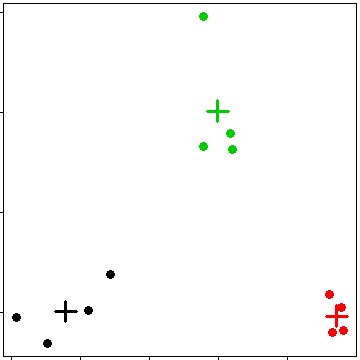

In [10]:
par(mar = rep(0.2,4))
plot(x,y,col = kmeansObj$cluster, pch = 19, cex = 1.5)
points(kmeansObj$centers, col = 1:3, pch = 3, cex = 2.5, lwd = 2.5)

Heatmaps

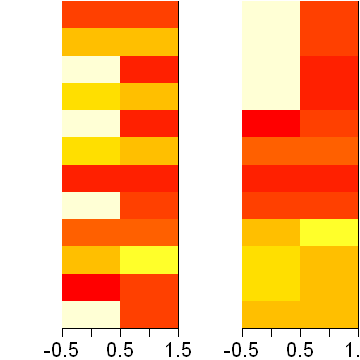

In [13]:
set.seed(1234)
dataMatrix <- as.matrix(dataframe)[sample(1:12),]
kmeansObj2 <- kmeans(dataMatrix, centers = 3)
par(mfrow = c(1,2), mar = c(2,4,0.1,0.1))
image(t(dataMatrix)[, nrow(dataMatrix):1], yaxt = "n")
image(t(dataMatrix)[, order(kmeansObj2$cluster)], yaxt = "n")

Principle Components Analysis and Singular Value Decomposition

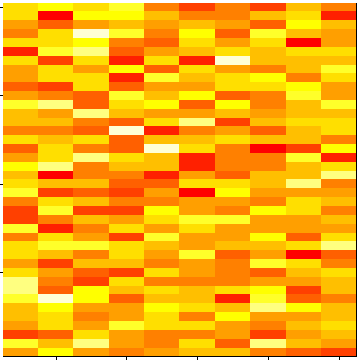

In [19]:
set.seed(12345)
par(mar = rep(0.2,4))
dataMatrix <- matrix(rnorm(400), nrow  = 40)
image(1:10, 1:40, t(dataMatrix)[, nrow(dataMatrix):1])

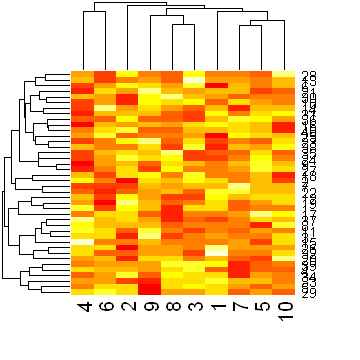

In [16]:
par(mar = rep(0.2,4))
heatmap(dataMatrix)

What if we add a pattern

In [20]:
set.seed(678910)
for (i in 1:40) {
    coinFlip <- rbinom(1, size = 1, prob = 0.5)
    if (coinFlip) {
        dataMatrix[i,] <- dataMatrix[i,] + rep(c(0,3), each = 5)
    }
}

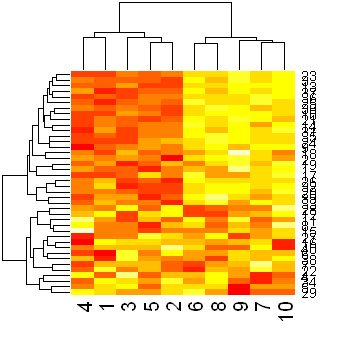

In [21]:
par(mar = rep(0.2,4))
heatmap(dataMatrix)

Patterns in rows and columns

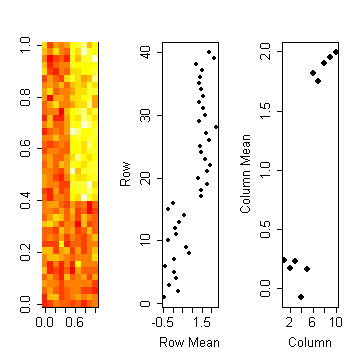

In [23]:
hh <- hclust(dist(dataMatrix))
dataMatrixOrdered <- dataMatrix[hh$order,]
par(mfrow = c(1,3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1])
plot(rowMeans(dataMatrixOrdered), 40:1, , xlab = "Row Mean", ylab = "Row", pch = 19)
plot(colMeans(dataMatrixOrdered), xlab = "Column", ylab = "Column Mean", pch = 16, cex = 1.5)

### Related problems

You have a multivariate variables $X_{1},...,X_{n}$ so $X_{1}=(X_{11},...,X_{1m})$

* Find a new set of milticariate cariables that are uncorrelated and explain as much variance as possible.
* If you put all the cariables together in one matrix, find the nest matrix created with fewer variables (lower rank) that explains the original data

The first goal is **statistical** the second goal is **data compression**

### Related Solutions

**SVD**

If $X$ is a matrix with each cariable in a column and each observation in a row then the SVD is a "matrix decomposition" $$ X = UDV^T $$ where the columns of $U$ are orhogonal (left singular vectors), the columns of $V$ are orthogonal (right singular vectors) and $D$ is a diagonal matrix (singular values).

**PCA**

The prinicple components are equal to the right singular values if you first scale (subtract the mean, divide by the standard deviation) the variables


### Components of the SVD - $u$ and $v$

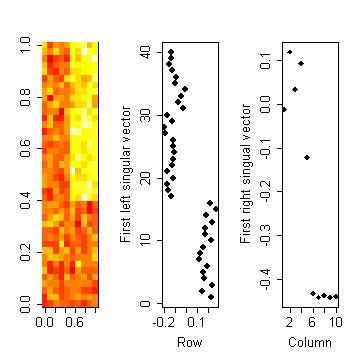

In [24]:
svd1 <- svd(scale(dataMatrixOrdered))
par(mfrow = c(1,3))
image(t(dataMatrixOrdered)[, nrow(dataMatrixOrdered):1])
plot(svd1$u[,1], 40:1, , xlab = "Row", ylab = "First left singular vector", pch = 19, cex = 1.5)
plot(svd1$v[,1], xlab = "Column", ylab = "First right singual vector", pch = 18, cex = 1.5)

## Lesson 3
### Working with Colour in R

Colour Utilities in R

* The **grDevices** package has two functions
    - colorRamp
    - colorRampPalette
* The functions take palettes of colours and help to interpolate between the colours
* The function **colors()** lists the names of teh colours you can use in any plotting function
* **colorRamp():** Take a palette of coulours and return a function that takes values between 0 and 1, indicating the extreme of the colour palette. (e.g. see the 'grey' function)
* **colorRampPalette():** Take a palette of colours and return a function that takes integer arguments and returns a vector of colours interpolating the palette

In [25]:
pal <- colorRampPalette(c("red", "yellow"))
pal(10)

[1] "#FF0000" "#FF1C00" "#FF3800" "#FF5500" "#FF7100" "#FF8D00" "#FFAA00"
 [8] "#FFC600" "#FFE200" "#FFFF00"

RColorBrewer Package

* One package on CRAN that contains intersting/useful colour palettes
* There are 3 type of palletes
    - Sequential
    - Diverging
    - Qualitative
* Palette infromation can be used in conjucation with the colorRamp and colorRampPalette

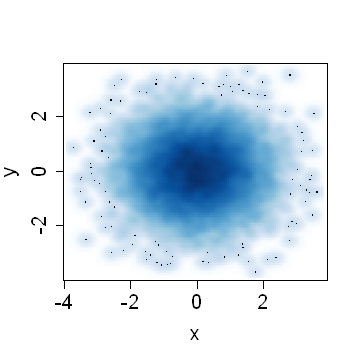

In [26]:
x <- rnorm(10000)
y <- rnorm(10000)
smoothScatter(x,y)